In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style

import scipy.stats as stats
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
import statistics as st

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
xls = pd.ExcelFile('Election_Data.xlsx')
dict = pd.read_excel(xls, 'Sheet1')
df = pd.read_excel(xls, 'Election_Dataset_Two Classes')

In [3]:
dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [4]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [5]:
df.shape

(1525, 10)

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [8]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
(df==0).sum()

Unnamed: 0                   0
vote                         0
age                          0
economic.cond.national       0
economic.cond.household      0
Blair                        0
Hague                        0
Europe                       0
political.knowledge        455
gender                       0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.shape

(1525, 9)

In [13]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


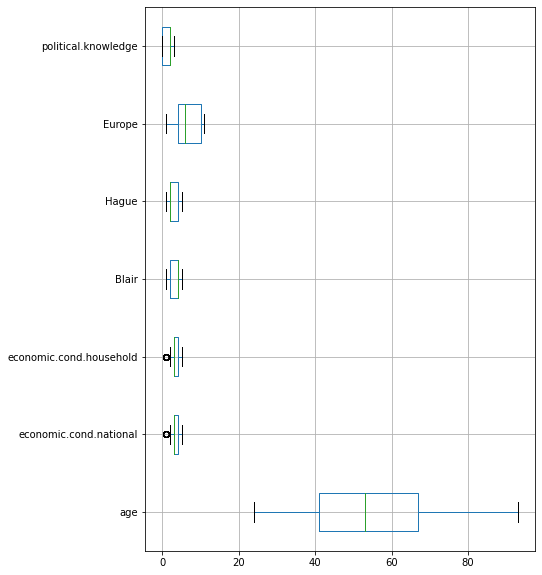

In [14]:
plt.figure(figsize=(7,10))
df.boxplot(vert=0)
plt.show()

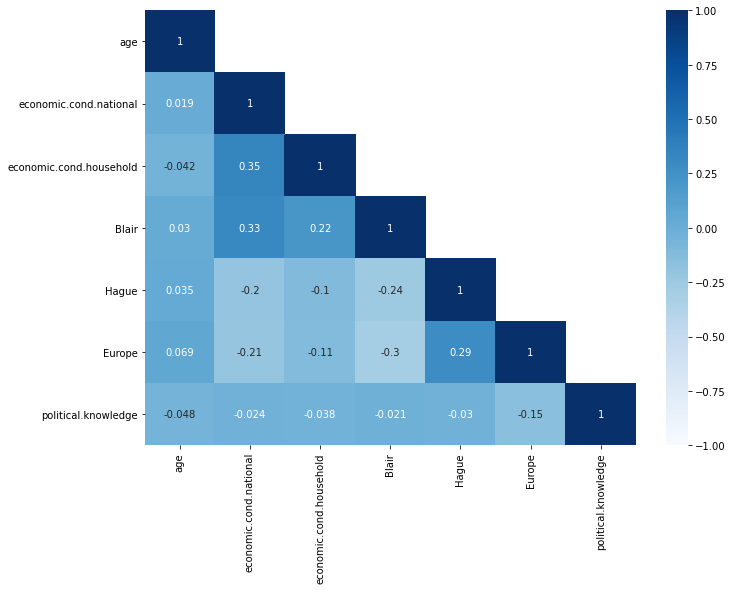

In [15]:
## Correlation Matrix
df_corr=df.corr()
plt.figure(figsize=(11,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

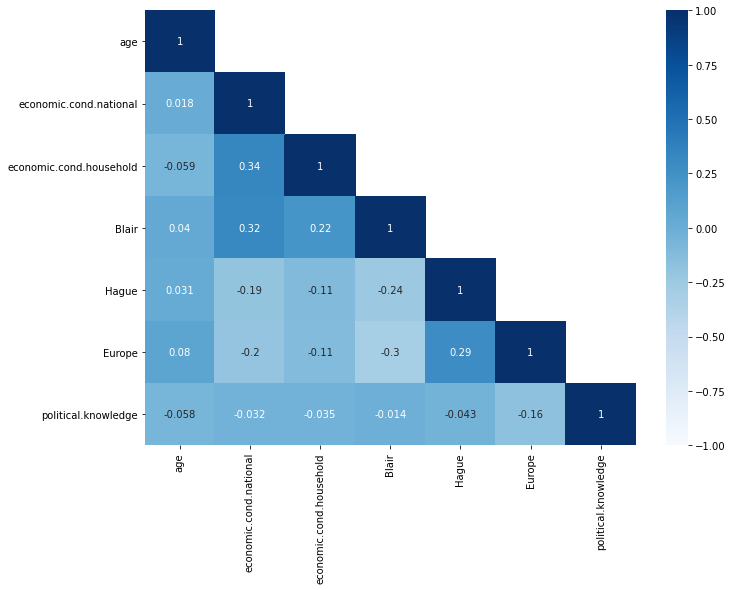

In [16]:
## Correlation Matrix
df_corr=df.corr(method='spearman')
plt.figure(figsize=(11,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

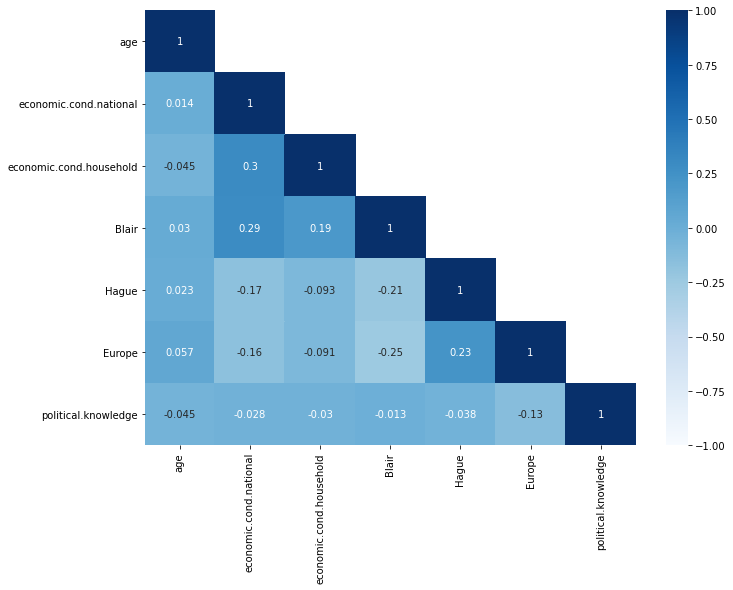

In [17]:
## Correlation Matrix
df_corr=df.corr(method='kendall')
plt.figure(figsize=(11,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

In [18]:
cat=['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

In [19]:
for i in cat:
    df[i]=df[i].astype("object")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [21]:
df.describe()

,age
count,1525.000000
mean,54.182295
std,15.711209
min,24.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,93.000000


In [22]:
df.duplicated().sum()

8

In [23]:
(8/1525)*100

0.5245901639344263

In [24]:
df.drop_duplicates(keep='first',inplace=True)

In [25]:
df.shape

(1517, 9)

In [26]:
df.describe()

,age
count,1517.000000
mean,54.241266
std,15.701741
min,24.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,93.000000


In [27]:
(df==0).sum()

vote                         0
age                          0
economic.cond.national       0
economic.cond.household      0
Blair                        0
Hague                        0
Europe                       0
political.knowledge        454
gender                       0
dtype: int64

In [28]:
st.variance(df['age'])

246.54465486143843

In [29]:
st.stdev(df['age'])

15.701740504206482

In [30]:
iqr(df['age'])

26.0

In [31]:
stats.skew(df['age'])


0.1396615989084527

In [32]:
stats.kurtosis(df['age'])

-0.9445526657032253

## UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'BOXPLOT FOR Age')

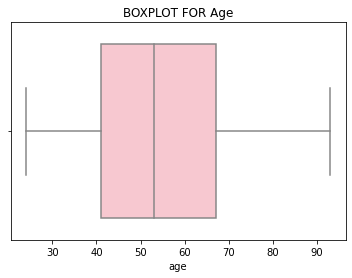

In [33]:
sns.boxplot('age',data=df,color='pink')
plt.title("BOXPLOT FOR Age")

Text(0.5, 1.0, 'DISTRIBUTION FOR Age')

<Figure size 504x288 with 0 Axes>

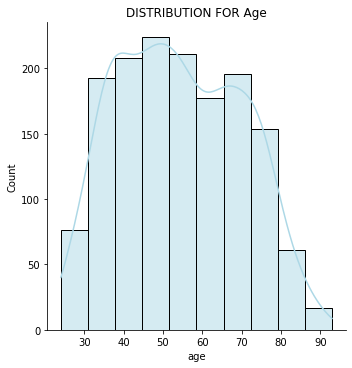

In [34]:
plt.figure(figsize=(7,4))
sns.displot(df['age'], bins=10, kde=True,color='lightblue')
plt.title("DISTRIBUTION FOR Age")

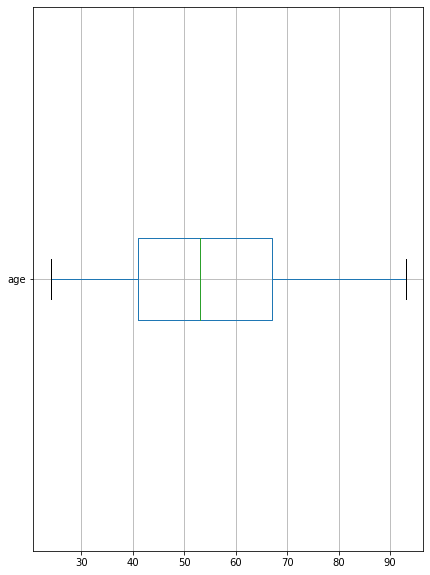

In [35]:
plt.figure(figsize=(7,10))
df.boxplot(vert=0)
plt.show()

### Unique Values of Categorical Variables

In [36]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
8     111
9     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




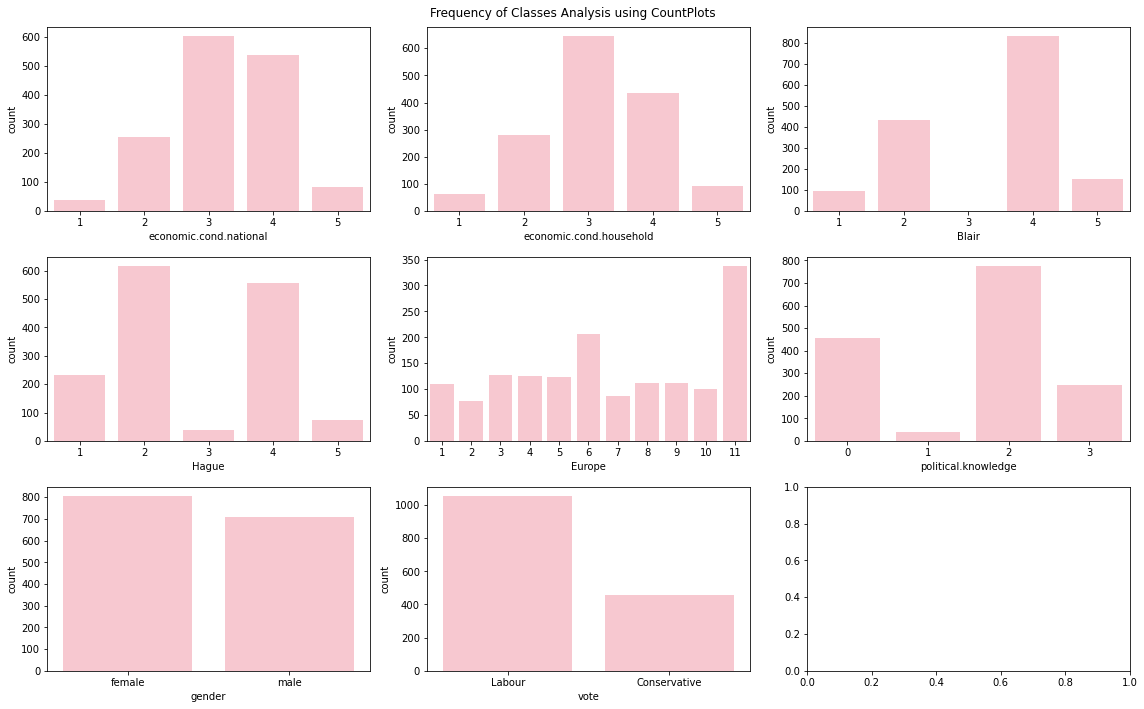

In [37]:
fig, ax = plt.subplots(3, 3, figsize = (16, 10))
ax = ax.flatten()
cat.append('gender')
cat.append('vote')

for i, c in enumerate(cat):
    sns.countplot(x = df[c], ax = ax[i],color='pink')
plt.suptitle('Frequency of Classes Analysis using CountPlots', fontsize = 12)
fig.tight_layout()

## BIVARAITE ANALYSIS

<AxesSubplot:xlabel='vote', ylabel='age'>

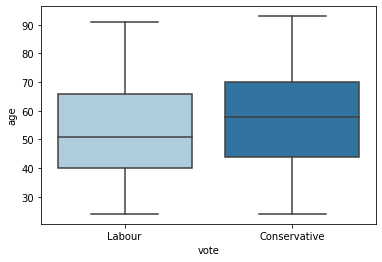

In [38]:
sns.boxplot(df["vote"], df['age'],palette = 'Paired') 

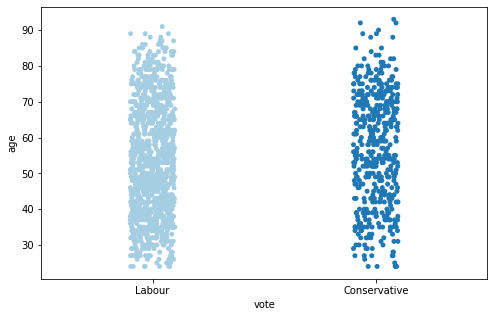

In [39]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True, palette = 'Paired') 
plt.show()

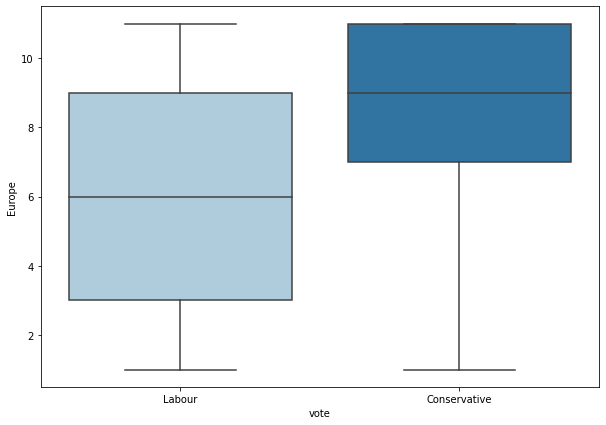

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(df["vote"], df['Europe'],palette = 'Paired') 
plt.show()

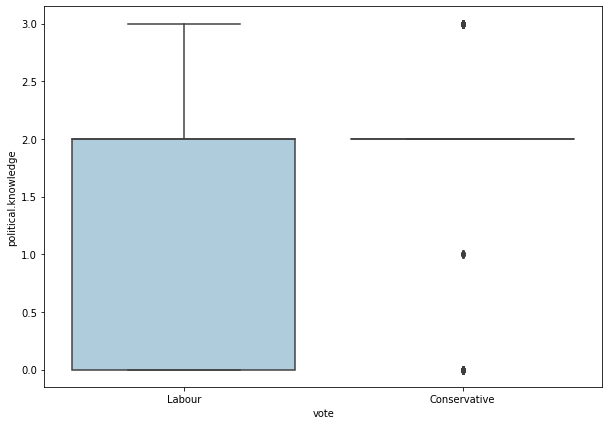

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(df["vote"], df['political.knowledge'],palette = 'Paired')  ### Distribution of values
plt.show()

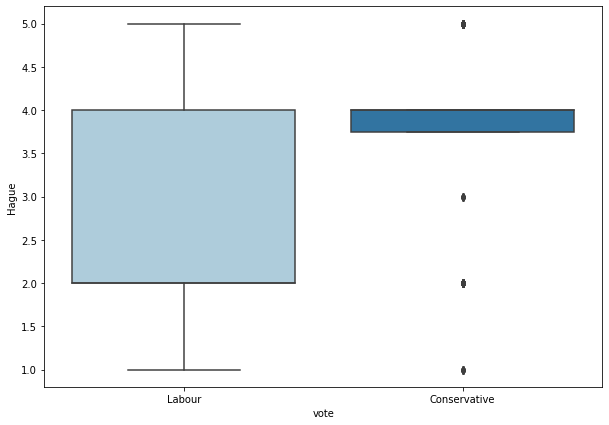

In [42]:
plt.figure(figsize=(10,7))
sns.boxplot(df["vote"], df['Hague'],palette = 'Paired')  ### Distribution of values
plt.show()

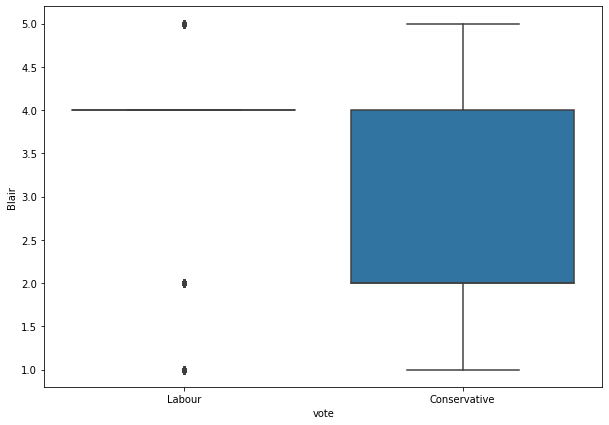

In [43]:
plt.figure(figsize=(10,7))
sns.boxplot(df["vote"], df['Blair'],palette = 'Paired')  ### Distribution of values
plt.show()

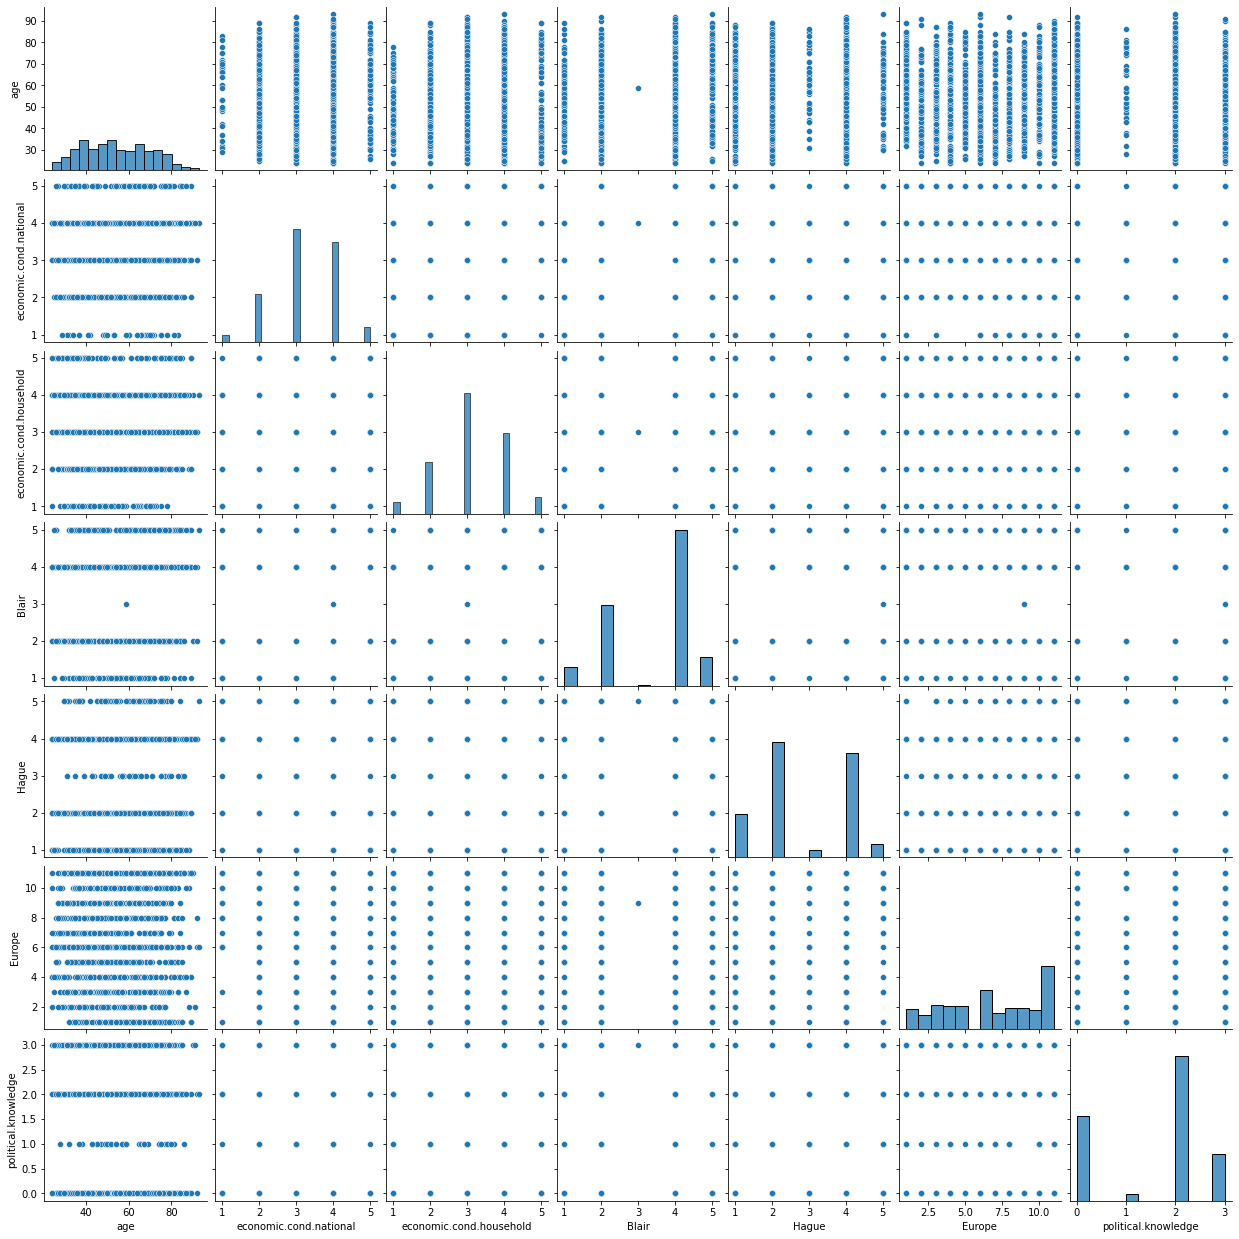

In [44]:
sns.pairplot(df,palette = 'Paired')

<AxesSubplot:xlabel='vote', ylabel='age'>

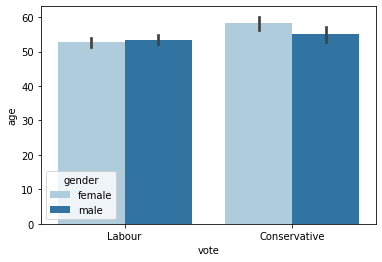

In [45]:
sns.barplot(x='vote',y='age',hue='gender',data=df,palette='Paired')

<AxesSubplot:title={'center':'Age Vs Vote with hue of Gender'}, xlabel='vote', ylabel='age'>

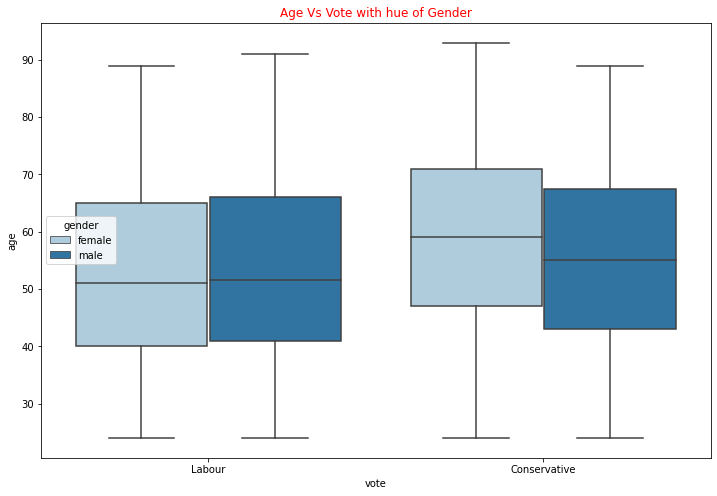

In [46]:
plt.figure(figsize=(12,8))
plt.title('Age Vs Vote with hue of Gender',color='red')
sns.boxplot(x='vote',y='age',hue='gender',data=df,palette='Paired')

<AxesSubplot:title={'center':'Europe vs Vote'}, xlabel='vote', ylabel='Europe'>

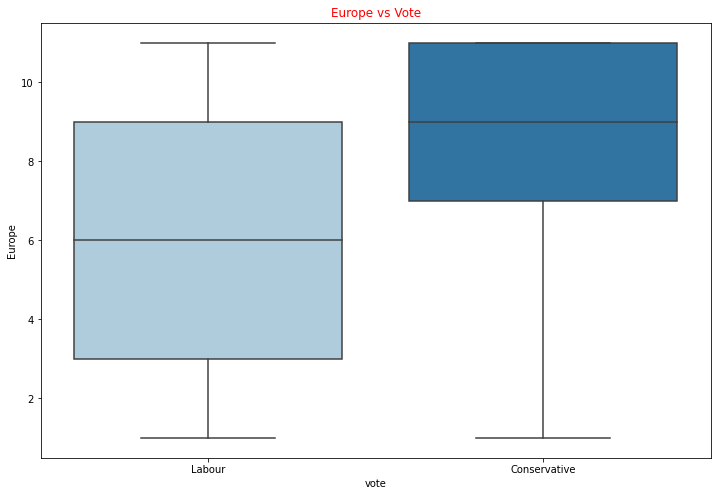

In [47]:
plt.figure(figsize=(12,8))
plt.title('Europe vs Vote',color='red')
sns.boxplot(df["vote"], df['Europe'],palette='Paired') 

<AxesSubplot:title={'center':'Economic Condition Household vs Vote'}, xlabel='vote', ylabel='economic.cond.household'>

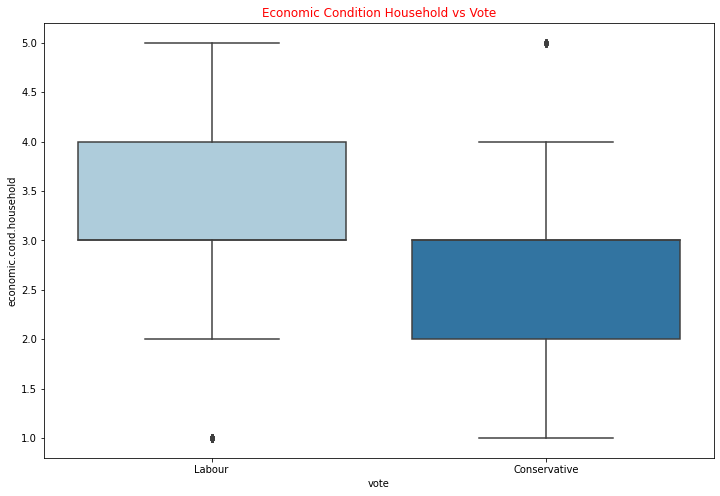

In [48]:
plt.figure(figsize=(12,8))
plt.title('Economic Condition Household vs Vote',color='red')
sns.boxplot(df["vote"], df['economic.cond.household'],palette='Paired') 

<AxesSubplot:title={'center':'Economic Condition National Vs Vote'}, xlabel='vote', ylabel='economic.cond.national'>

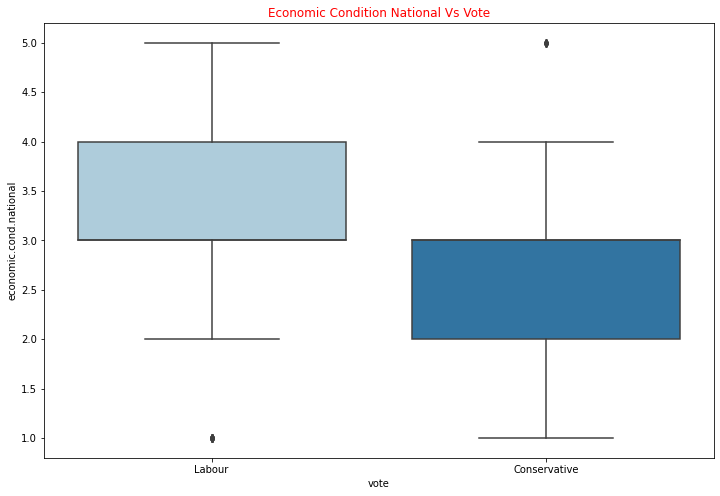

In [49]:
plt.figure(figsize=(12,8))
plt.title('Economic Condition National Vs Vote',color='red')
sns.boxplot(df["vote"], df['economic.cond.national'],palette='Paired') 

### ENCODING Gender & Target Variables

In [50]:
df =pd.get_dummies(df, columns=['gender'],drop_first=True)

In [51]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


#### Using Custom coding for target variable

In [52]:
df['vote'].replace('Labour',0,inplace=True)

In [53]:
df['vote'].replace('Conservative',1,inplace=True)

In [54]:
df['vote'].value_counts()

0    1057
1     460
Name: vote, dtype: int64

In [55]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


In [56]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [57]:
## SPLITTING THE DATA

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [59]:
X.shape

(1517, 8)

In [60]:
y.shape

(1517,)

In [61]:
X_train.shape

(1061, 8)

In [62]:
y_train.shape

(1061,)

In [63]:
X_test.shape

(456, 8)

In [64]:
y_train.value_counts(normalize=True)

0    0.71065
1    0.28935
Name: vote, dtype: float64

In [65]:
y_test.value_counts(normalize=True)

0    0.664474
1    0.335526
Name: vote, dtype: float64

## LOGISTIC REGRESSION

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [68]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.572908,0.427092
1,0.855453,0.144547
2,0.994144,0.005856
3,0.154036,0.845964
4,0.940473,0.059527


In [69]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8369462770970783

AUC: 0.890


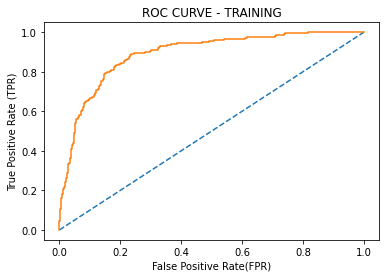

In [70]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TRAINING');

In [71]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8245614035087719

AUC: 0.890


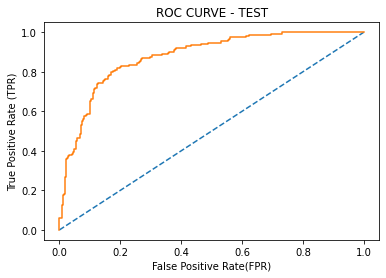

In [72]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TEST');

In [73]:
confusion_matrix(y_train, ytrain_predict)

array([[688,  66],
       [107, 200]])

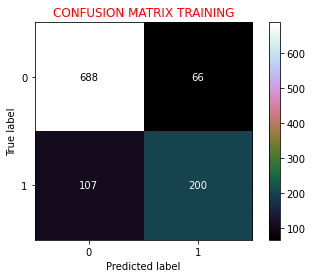

In [74]:
plot_confusion_matrix(model,X_train,y_train,cmap='cubehelix')
plt.title('CONFUSION MATRIX TRAINING',color='red');

In [75]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       754
           1       0.75      0.65      0.70       307

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [76]:
confusion_matrix(y_test, ytest_predict)

array([[266,  37],
       [ 43, 110]])

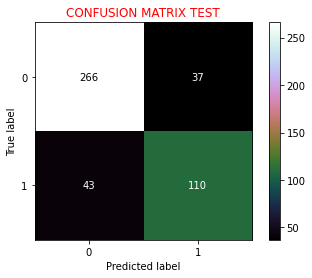

In [77]:
plot_confusion_matrix(model,X_test,y_test,cmap='cubehelix')
plt.title('CONFUSION MATRIX TEST',color='red');

In [78]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.72      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



## Discriminant Analysis

In [79]:
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [80]:
ytest_predict_prob=LDA_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.537907,0.462093
1,0.866045,0.133955
2,0.993586,0.006414
3,0.138790,0.861210
4,0.943455,0.056545


In [81]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



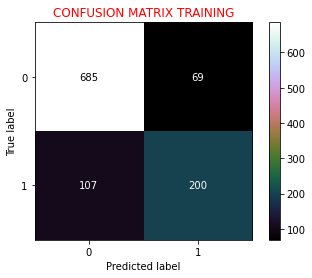

In [82]:
plot_confusion_matrix(LDA_model,X_train,y_train,cmap='cubehelix')
plt.title('CONFUSION MATRIX TRAINING',color='red');

AUC: 0.889


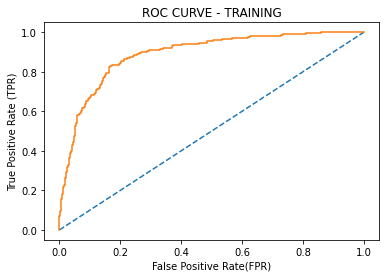

In [83]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TRAINING');

In [84]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[269  34]
 [ 42 111]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



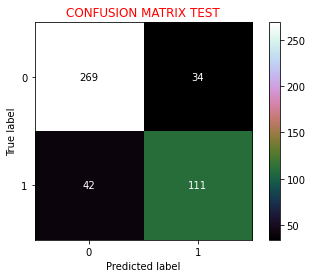

In [85]:
plot_confusion_matrix(LDA_model,X_test,y_test,cmap='cubehelix')
plt.title('CONFUSION MATRIX TEST',color='red');

AUC: 0.889


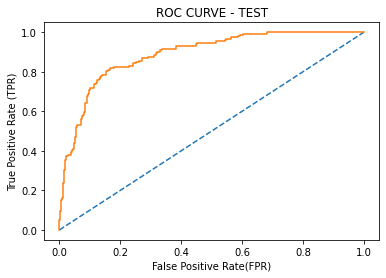

In [86]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TEST');

## KNN Model

In [87]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [114]:
## ytest_predict_prob=KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.576362,0.423638
1,0.850032,0.149968
2,0.992594,0.007406
3,0.166786,0.833214
4,0.930053,0.069947


In [88]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8623939679547596
[[705  49]
 [ 97 210]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       754
           1       0.81      0.68      0.74       307

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061



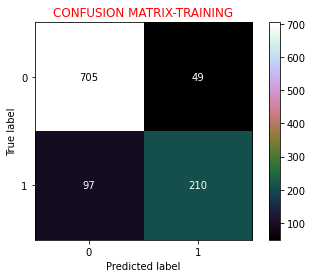

In [89]:
plot_confusion_matrix(KNN_model,X_train,y_train,cmap='cubehelix')
plt.title('CONFUSION MATRIX-TRAINING',color='red');

AUC: 0.926


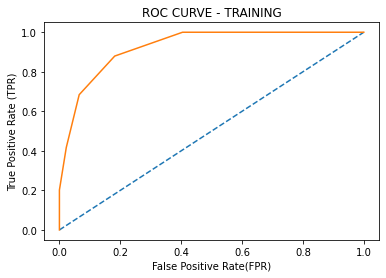

In [90]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TRAINING');

In [91]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[274  29]
 [ 53 100]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       303
           1       0.78      0.65      0.71       153

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



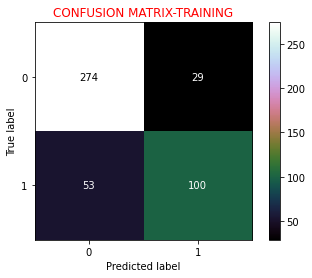

In [92]:
plot_confusion_matrix(KNN_model,X_test,y_test,cmap='cubehelix')
plt.title('CONFUSION MATRIX-TRAINING',color='red');

AUC: 0.926


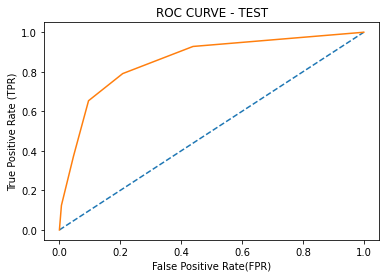

In [93]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TEST');

### Naive Bayes Model

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [95]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [96]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[675  79]
 [ 96 211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



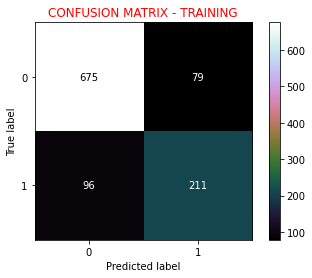

In [97]:
plot_confusion_matrix(NB_model,X_train,y_train,cmap='cubehelix')
plt.title("CONFUSION MATRIX - TRAINING",color='red');

AUC: 0.888


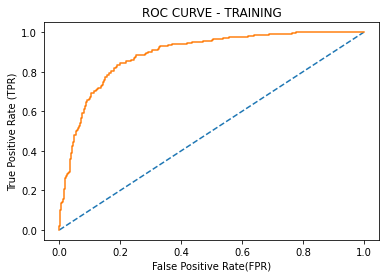

In [98]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TRAINING');

In [99]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[263  40]
 [ 41 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



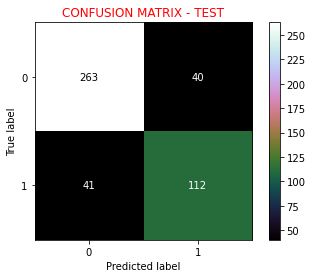

In [100]:
plot_confusion_matrix(NB_model,X_test,y_test,cmap='cubehelix')
plt.title("CONFUSION MATRIX - TEST",color='red');

AUC: 0.888


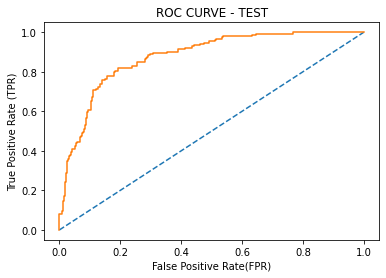

In [101]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TEST');

## Applying GridSearchCV for Logistic Regression


In [102]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg','sag','saga'],
      'tol':[0.0001,0.001]}

In [103]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [104]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='accuracy')

In [105]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'sag', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='accuracy')

In [106]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg')


In [107]:
best_model = grid_search.best_estimator_

In [108]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [109]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.576362,0.423638
1,0.850032,0.149968
2,0.992594,0.007406
3,0.166786,0.833214
4,0.930053,0.069947


AUC: 0.890


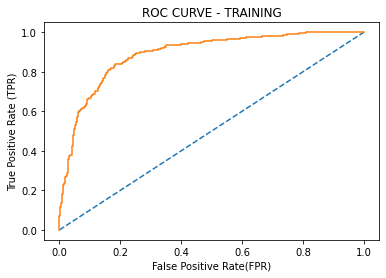

In [110]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TRAINING');

AUC: 0.890


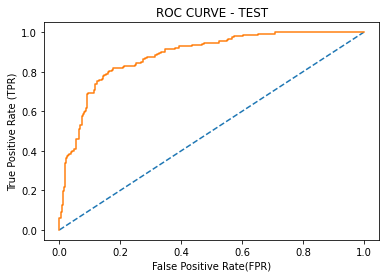

In [111]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TEST');

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



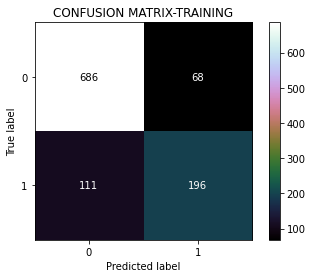

In [112]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train,cmap='cubehelix')
plt.title('CONFUSION MATRIX-TRAINING')
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.72      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



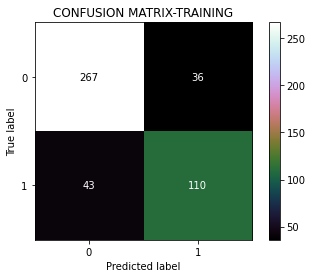

In [504]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test,cmap='cubehelix')
plt.title('CONFUSION MATRIX-TRAINING')
print(classification_report(y_test, ytest_predict),'\n');

In [124]:
best_model.coef_

array([[ 0.01494785, -0.62871252, -0.06308927, -0.600866  ,  0.82323562,
         0.21160764,  0.3220118 , -0.19182648]])

In [125]:
best_model.intercept_

array([-2.0753724])

## GridSearchCv on LDA

In [505]:
grid={'solver':['svd', 'lsqr', 'eigen'],'tol':[0.0001,0.001]}

In [506]:
model = LinearDiscriminantAnalysis()

In [507]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='accuracy')

In [508]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]},
             scoring='accuracy')

In [509]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [510]:
best_model = grid_search.best_estimator_

In [511]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [512]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.537907,0.462093
1,0.866045,0.133955
2,0.993586,0.006414
3,0.138790,0.861210
4,0.943455,0.056545


              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



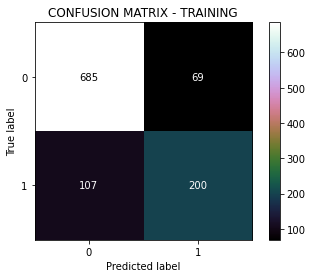

In [513]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train,cmap='cubehelix')
plt.title('CONFUSION MATRIX - TRAINING')
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.889


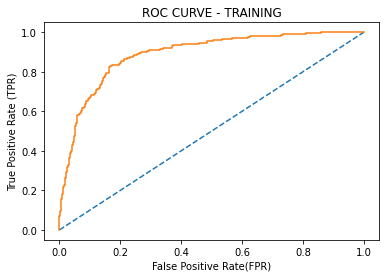

In [514]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TRAINING');

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



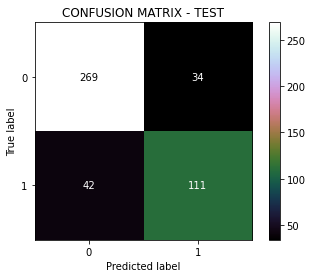

In [515]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test,cmap='cubehelix')
plt.title('CONFUSION MATRIX - TEST')
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.889


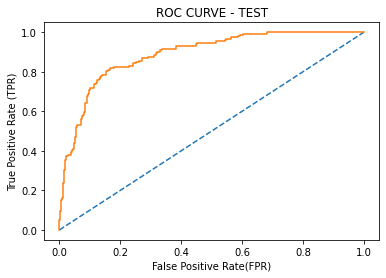

In [516]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TEST');

## TUNING Naive Bayes Model

In [517]:
## Applying GridSearchCV for Naive Bayes
param_grid_nb={'var_smoothing' : np.logspace(0,-9,num=100)}

NB_model = GaussianNB()

In [518]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0015199110829529332)


In [519]:
best_model = grid_search.best_estimator_

In [520]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [521]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.537907,0.462093
1,0.866045,0.133955
2,0.993586,0.006414
3,0.138790,0.861210
4,0.943455,0.056545


              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



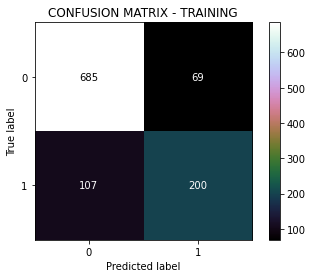

In [522]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train,cmap='cubehelix')
plt.title('CONFUSION MATRIX - TRAINING')
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.889


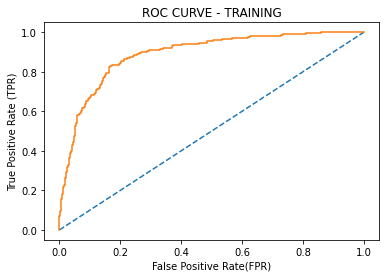

In [523]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TRAINING');

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



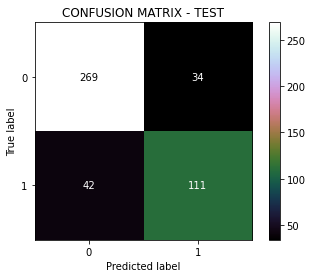

In [524]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test,cmap='cubehelix')
plt.title('CONFUSION MATRIX - TEST')
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.889


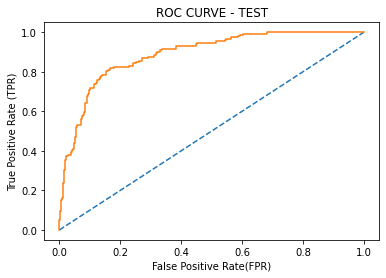

In [525]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('ROC CURVE - TEST');

In [526]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(NB_model,X_train, y_train, cv =10)
print("Cross Validation Score:", scores,scores)
print("Average Score:", np.average(scores))

Cross Validation Score: [0.80373832 0.78301887 0.8490566  0.83962264 0.90566038 0.8490566
 0.78301887 0.83962264 0.81132075 0.82075472] [0.80373832 0.78301887 0.8490566  0.83962264 0.90566038 0.8490566
 0.78301887 0.83962264 0.81132075 0.82075472]
Average Score: 0.8284870393228706


## Tuning KNN Model

In [530]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2149122807017544,
 0.20614035087719296,
 0.17982456140350878,
 0.17763157894736847,
 0.1864035087719298,
 0.19956140350877194,
 0.19517543859649122,
 0.19517543859649122,
 0.20175438596491224,
 0.19736842105263153]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

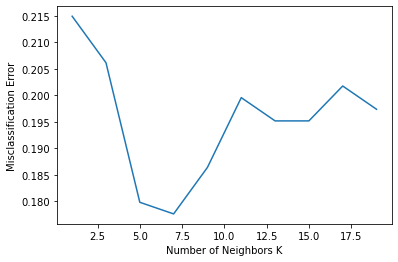

In [531]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Best Accuracy for k=7

In [532]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [533]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8435438265786993
[[693  61]
 [105 202]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       754
           1       0.77      0.66      0.71       307

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [534]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[276  27]
 [ 54  99]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       303
           1       0.79      0.65      0.71       153

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [535]:
# auto -  considers algorithm that best splits the data
# ball tree - Uses centriod to calculate distances - High diamensional data
# KD tree -  Uses Median to calculate distances -  Low diamensional data
# Brute - Used when k is even.Consider each element and identifies the majority class.
params = {'n_neighbors':[2,4,6,8,10,12,14,16,18],
         'algorithm': ['auto','ball_tree','kd_tree','brute'],
         'leaf_size':list(range(1,30)),
         'p':[1,2],
         'metric':['minkowski','euclidean','manhattan','chebyshev', 'mahanalobis']}

In [536]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params, refit=True,verbose=1)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10440 candidates, totalling 52200 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'mahanalobis'],
                         'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'p': [1, 2]},
             verbose=1)

In [537]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 27,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1}

In [539]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve

print("Train Accuracy is :{}".format(accuracy_score(y_train,grid_knn.predict(X_train))))
print("\nTest Accuracy is :{}".format(accuracy_score(y_test,grid_knn.predict(X_test))))

Train Accuracy is :0.8435438265786993

Test Accuracy is :0.7982456140350878


In [540]:
print("\n Train ROC -AUC score is :{}". format(roc_auc_score(y_train,grid_knn.predict_proba(X_train)[:,1])))
print("\n Test ROC -AUC score is :{}". format(roc_auc_score(y_test,grid_knn.predict_proba(X_test)[:,1])))


 Train ROC -AUC score is :0.90789621475907

 Test ROC -AUC score is :0.8659160033650424


In [541]:
print("\nConfusion matrix for train set: ","\n", confusion_matrix(y_train,grid_knn.predict(X_train)))
print("\nConfusion matrix for test set: ","\n", confusion_matrix(y_test,grid_knn.predict(X_test)))


Confusion matrix for train set:  
 [[713  41]
 [125 182]]

Confusion matrix for test set:  
 [[277  26]
 [ 66  87]]


In [542]:
from sklearn.metrics import classification_report
print("Classification report for Train set:")
print(classification_report(y_train,grid_knn.predict(X_train)))

Classification report for Train set:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       754
           1       0.82      0.59      0.69       307

    accuracy                           0.84      1061
   macro avg       0.83      0.77      0.79      1061
weighted avg       0.84      0.84      0.84      1061



In [549]:
print("Classification report for Test set:")
print(classification_report(y_test,grid_knn.predict(X_test)))

Classification report for Test set:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       303
           1       0.77      0.57      0.65       153

    accuracy                           0.80       456
   macro avg       0.79      0.74      0.76       456
weighted avg       0.79      0.80      0.79       456



## Ada Boost


In [550]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [551]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[688  66]
 [ 93 214]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.76      0.70      0.73       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [552]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[268  35]
 [ 50 103]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [553]:
print("\n Train ROC -AUC score is :{}". format(roc_auc_score(y_train,ADB_model.predict_proba(X_train)[:,1])))
print("\n Test ROC -AUC score is :{}". format(roc_auc_score(y_test,ADB_model.predict_proba(X_test)[:,1])))


 Train ROC -AUC score is :0.9148061586846266

 Test ROC -AUC score is :0.8773808753424361


## Gradient Boosting

In [554]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [555]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[708  46]
 [ 68 239]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [556]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[276  27]
 [ 48 105]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.80      0.69      0.74       153

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



In [558]:
print("\n Train ROC -AUC score is :{}". format(roc_auc_score(y_train,gbcl.predict_proba(X_train)[:,1])))
print("\n Test ROC -AUC score is :{}". format(roc_auc_score(y_test,gbcl.predict_proba(X_test)[:,1])))


 Train ROC -AUC score is :0.951155185373988

 Test ROC -AUC score is :0.8991673677171639


### Random Forest 

In [559]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [560]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [561]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[276  27]
 [ 51 102]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.79      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



In [562]:
print("\n Train ROC -AUC score is :{}". format(roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1])))
print("\n Test ROC -AUC score is :{}". format(roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1])))


 Train ROC -AUC score is :1.0

 Test ROC -AUC score is :0.8954140512090425


## Bagging

In [563]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [564]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [565]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[266  37]
 [ 45 108]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.74      0.71      0.72       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [566]:
print("\n Train ROC -AUC score is :{}". format(roc_auc_score(y_train,Bagging_model.predict_proba(X_train)[:,1])))
print("\n Test ROC -AUC score is :{}". format(roc_auc_score(y_test,Bagging_model.predict_proba(X_test)[:,1])))


 Train ROC -AUC score is :1.0

 Test ROC -AUC score is :0.881349899695852


In [567]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RAND = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RAND,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [568]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[750   4]
 [ 30 277]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       754
           1       0.99      0.90      0.94       307

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [569]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[274  29]
 [ 49 104]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       303
           1       0.78      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [570]:
print("\n Train ROC -AUC score is :{}". format(roc_auc_score(y_train,Bagging_model.predict_proba(X_train)[:,1])))
print("\n Test ROC -AUC score is :{}". format(roc_auc_score(y_test,Bagging_model.predict_proba(X_test)[:,1])))


 Train ROC -AUC score is :0.9973906807558386

 Test ROC -AUC score is :0.8966435859272202
